In [1]:
import torch
import torch.nn as nn

In [2]:
filename = "../weights/facenet.pt"
device = "cuda" if torch.cuda.is_available else "cpu"

In [3]:
class HParams:
    def __init__(self):
        self.pretrained = False
        self.use_se = True

config = HParams()

In [4]:
import sys
sys.path.append("../models")
from facenet import resnet101

In [5]:
model = resnet101(config)
model.load_state_dict(torch.load(filename, map_location=torch.device('cuda')))
model.fc = nn.Linear(8192, 512)
model = nn.DataParallel(model)

In [6]:
model

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=1)
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): IRBlock(
        (bn0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (prelu): PReLU(num_parameters=1)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (se): SEBlock(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (fc): Sequential(
      

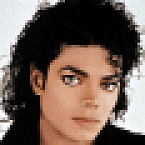

In [7]:
from PIL import Image
Image.open("../test/1_1.jpg")

In [8]:
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Normalize, Resize

transform = transforms.Compose([
    Resize((64, 64)),
    ToTensor(),
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [15]:
model.eval()
vector = model(transform(Image.open("../test/1_1.jpg")).unsqueeze(0).to(device)).squeeze(0)
vector2 = model(transform(Image.open("../test/michael-jackson-bad-low-res-58.jpg")).unsqueeze(0).to(device)).squeeze(0)
vector3 = model(transform(Image.open("../test/obama_1.jpg")).unsqueeze(0).to(device)).squeeze(0)

In [16]:
vector.size()

torch.Size([512])

In [17]:
mj_score = 0
obama_score = 0
for i in range(512):
    mj_score += (vector[i] - vector2[i]) ** 2
    obama_score += (vector2[i] - vector3[i]) ** 2

print(mj_score, obama_score)


tensor(0.0035, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.1296, device='cuda:0', grad_fn=<AddBackward0>)
